<a href="https://colab.research.google.com/github/a00351269/Actividades_Aprendizaje-/blob/main/Actividad6DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Actividad Semanal -- 6, visualización**
## **Maestría en Inteligencia Artificial Aplicada**
### **Curso: TC4029.10 Ciencia y analítica de datos (Gpo 10)**
## **Tecnológico de Monterrey**
## **Prof: Dra, Maria de la Paz Rico Fernandez**



### **Alumno: Genaro Ramos Higuera  -  Matrícula A00351269**
### **Fecha: 31 de octubre del 2022**

1.- Descarga los datos y carga el dataset en tu libreta. 

2.- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

3.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna

4.- Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

5.- Realiza el conteo de las variables categóricas

6.- Escala los datos, si consideras necesario

7.- Reduce las dimensiones con PCA, si consideras necesario.

7.1.- Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

7.2.-Indica la importancia de las variables en cada componente

8.- Elabora los histogramas de los atributos para visualizar su distribución

9.- Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

10.- Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.







#1.-Descarga los datos y carga el dataset en tu libreta.

Comenzamos por importar las librerías para trabajar

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


Proseguimos convirtiendo el archivo csv a trabajar a una data frame

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv', index_col = 0)


#2.- Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

Esta es la informacion del Dataframe que tiene 30,000 registros, y notamos que algunos tienen registros con algunas columnas con datos nulos:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  int64  
 1   X2      29999 non-null  float64
 2   X3      29998 non-null  float64
 3   X4      29998 non-null  float64
 4   X5      29995 non-null  float64
 5   X6      29997 non-null  float64
 6   X7      29995 non-null  float64
 7   X8      29993 non-null  float64
 8   X9      29991 non-null  float64
 9   X10     29984 non-null  float64
 10  X11     29986 non-null  float64
 11  X12     29989 non-null  float64
 12  X13     29989 non-null  float64
 13  X14     29987 non-null  float64
 14  X15     29985 non-null  float64
 15  X16     29983 non-null  float64
 16  X17     29990 non-null  float64
 17  X18     29992 non-null  float64
 18  X19     29991 non-null  float64
 19  X20     29992 non-null  float64
 20  X21     29989 non-null  float64
 21  X22     29989 non-null  float64
 22

Descripcion de las Variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. 

We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. 

The measurement scale for the repayment status is:

 -1 = pay duly; 
 
 1 = payment delay for one month; 
 
 2 = payment delay for two months; . . .; 
 
 8 = payment delay for eight months; 
 
 9 = payment delay for nine months and above. 


X12-X17: Amount of bill statement (NT dollar). 

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005; . . .; 

X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). 

X18 = amount paid in September, 2005; 

X19 = amount paid in August, 2005; . . .;

X23 = amount paid in April, 2005. 


In [4]:
df.shape

(30000, 24)

In [5]:
df.dtypes

X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Vamos a asignar nombres acordes a lo que representa cada variable
Y con ello poder decidir que hacer con los datos faltantes.

In [6]:
columns_name = ['AMT','SEX','EDUCATION','MARRIAGE','AGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','BILL_1','BILL_2','BILL_3','BILL_4','BILL_5','BILL_6','PAY_1',
                'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Y']
df.columns = columns_name
df.columns

Index(['AMT', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAYSTAT_1', 'PAYSTAT_2',
       'PAYSTAT_3', 'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6', 'BILL_1', 'BILL_2',
       'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'Y'],
      dtype='object')

#3.- Limpia los datos eliminando los registros nulos o rellena con la media de la columna


Primeramente verificamos que en nuestro archivo no se encuentren ID repetidos, y esto lo hacemos con las siguientes instrucciones:

In [7]:
#Saquemos un reporte de los registros nulos.
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

AMT
False    30000
Name: AMT, dtype: int64

SEX
False    29999
True         1
Name: SEX, dtype: int64

EDUCATION
False    29998
True         2
Name: EDUCATION, dtype: int64

MARRIAGE
False    29998
True         2
Name: MARRIAGE, dtype: int64

AGE
False    29995
True         5
Name: AGE, dtype: int64

PAYSTAT_1
False    29997
True         3
Name: PAYSTAT_1, dtype: int64

PAYSTAT_2
False    29995
True         5
Name: PAYSTAT_2, dtype: int64

PAYSTAT_3
False    29993
True         7
Name: PAYSTAT_3, dtype: int64

PAYSTAT_4
False    29991
True         9
Name: PAYSTAT_4, dtype: int64

PAYSTAT_5
False    29984
True        16
Name: PAYSTAT_5, dtype: int64

PAYSTAT_6
False    29986
True        14
Name: PAYSTAT_6, dtype: int64

BILL_1
False    29989
True        11
Name: BILL_1, dtype: int64

BILL_2
False    29989
True        11
Name: BILL_2, dtype: int64

BILL_3
False    29987
True        13
Name: BILL_3, dtype: int64

BILL_4
False    29985
True        15
Name: BILL_4, dtype: int64

BILL_5
False

Ahora veamos los valores de Monto de Crédito Otorgados que sean válidos.

Verificamos  que X1 incluyan solo montos positivos :

In [8]:
df.loc[df['AMT'] < 0] # para saber que registros tienen un monto negativo

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,


Seguido, checamos que SEX solo sean valores de 1 o 2

In [9]:
df_clean=df.copy()

In [10]:
(df_clean['SEX'].values < 1).sum() + (df_clean['SEX'].values > 2).sum()

0

In [11]:
hombres=df_clean.loc[df_clean['SEX'] == 1,"SEX"].count()
mujeres=df_clean.loc[df_clean['SEX'] == 2,"SEX"].count()
prop_hombres=hombres/(hombres+mujeres)
prop_mujeres=mujeres/(hombres+mujeres)

print ("De los cuales hombres son ",hombres," y mujeres ", mujeres)
print ("Con proporcion de hombres de ", prop_hombres, "y de mujeres de ", prop_mujeres, " respectivamente.")

De los cuales hombres son  11887  y mujeres  18112
Con proporcion de hombres de  0.39624654155138506 y de mujeres de  0.6037534584486149  respectivamente.


Sabemos que hay 30,000 registros esto significa que uno de ellos es Nulo

In [12]:
# creamos una serie booleana para encontrar el registro nulo
sexo_nulo = pd.isnull(df_clean["SEX"])
   
# filtramos los datos
# desplegamos el datos con "SEX" = NaN
df_clean[sexo_nulo]


,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,
24366,130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,0.0


In [13]:
#Ahora reeemplazamos el registro con sexo nulo dandole el 2 por ser el mayor porcentaje con el 60%
df_clean["SEX"].fillna(2,inplace=True)
df_clean.loc[24366:24366]

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,
24366,130000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,0.0


Ahora seguimos con EDUCATION, que son el nivel de educación solo debe admitir valores de 1, 2, 3, y 4 para cualquier otro. Así que verificamos

In [14]:
print('Valores menores a 1: ' + str((df_clean['EDUCATION'].values < 1).sum()))
print('Valores mayores a 4: ' + str((df_clean['EDUCATION'].values > 4).sum()))

Valores menores a 1: 14
Valores mayores a 4: 331


Vemos que hay 331 valores mayores a 4. En este caso tomaremos la suposición de que todo valor mayor a 4 puede entrar dentro del valor 4, que significa "4 = others".

In [15]:
EDUCATION_values = []
for i in range(0,len(df_clean.index)):
  if df_clean['EDUCATION'].iloc[i] > 4:
    if df_clean['EDUCATION'].iloc[i] not in EDUCATION_values:
      EDUCATION_values.append(int(df_clean['EDUCATION'].iloc[i]))
for i in EDUCATION_values:
  df_clean['EDUCATION'].replace(i,4,inplace=True)

print('Valores mayores a 4: ' + str((df_clean['EDUCATION'].values > 4).sum()))

Valores mayores a 4: 0


In [16]:
print('Valores menores a 1: ' + str((df_clean['EDUCATION'].values < 1).sum()))
print('Valores mayores a 4: ' + str((df_clean['EDUCATION'].values > 4).sum()))

Valores menores a 1: 14
Valores mayores a 4: 0


Mientras que los valores menores a 1, que solo son 14, los remplazaremos el promedio

In [17]:
EDUCATION_mean = df_clean.EDUCATION.mean()
print('Promedio de EDUCATION: ' + str(int(EDUCATION_mean)))
df_clean['EDUCATION'].replace(0,int(EDUCATION_mean),inplace=True)
print('Valores menores a 1: ' + str((df_clean['EDUCATION'].values < 1).sum()))

Promedio de EDUCATION: 1
Valores menores a 1: 0


In [18]:
# creamos una serie booleana para encontrar registros nulos en EDUCATION
educacion_nulos = pd.isnull(df_clean["EDUCATION"])
   
# filtramos los datos
# desplegamos los registros con "EDUCATION" = NaN
df_clean[educacion_nulos]

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,
6228,30000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21120.0,1586.0,1365.0,1663.0,5106.0,1050.0,0.0,0.0
24366,130000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,0.0


In [19]:
# les asignamos la media de educacion = 1 a los 2 registros nulos encontrados
df_clean["EDUCATION"].fillna(1,inplace=True)

In [20]:
df_clean.loc[24366:24366]


,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,
24366,130000,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,0.0


In [21]:
df_clean.loc[6228:6228]

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,
6228,30000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21120.0,1586.0,1365.0,1663.0,5106.0,1050.0,0.0,0.0


No debiesen haber registros nulos en EDUCATION y lo comprobamos así:

In [22]:
educacion_nulos = pd.isnull(df_clean["EDUCATION"])
   
# filtramos los datos
# desplegamos los registros con "EDUCATION" = NaN
df_clean[educacion_nulos] 

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,


MARRIAGE solo debería admitir valores de 1, 2, y 3. así que verificamos

In [23]:
print('Valores menores a 1: ' + str((df_clean['MARRIAGE'].values < 1).sum()))
print('Valores mayores a 3: ' + str((df_clean['MARRIAGE'].values > 3).sum()))

Valores menores a 1: 54
Valores mayores a 3: 0


Descubrimos 54 valores de 0, así que sustituimos por el promedio

In [24]:
MARRIAGE_mean = df_clean.MARRIAGE.mean()
print('Promedio de MARRIAGE: ' + str(int(MARRIAGE_mean)))
df_clean['MARRIAGE'].replace(0,int(MARRIAGE_mean),inplace=True)
print('Valores menores a 1: ' + str((df_clean['MARRIAGE'].values < 1).sum()))

Promedio de MARRIAGE: 1
Valores menores a 1: 0


In [25]:
# creamos una serie booleana para encontrar registros nulos en MARRIAGE
marital_status_nulos = pd.isnull(df_clean["MARRIAGE"])
   
# filtramos los datos
# desplegamos los registros con "MARRIAGE" = NaN
df_clean[marital_status_nulos]

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,
6228,30000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21120.0,1586.0,1365.0,1663.0,5106.0,1050.0,0.0,0.0
24366,130000,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,0.0


In [26]:
# les asignamos la media de Marital Status = 1 Married a los 2 registros nulos encontrados
df_clean["MARRIAGE"].fillna(1,inplace=True)

In [27]:
df_clean.loc[6228:6228, "AMT":"MARRIAGE"]

,AMT,SEX,EDUCATION,MARRIAGE
ID,,,,
6228,30000,1.0,1.0,1.0


In [28]:
df_clean.loc[24366:24366, "AMT":"MARRIAGE"]

,AMT,SEX,EDUCATION,MARRIAGE
ID,,,,
24366,130000,2.0,1.0,1.0


Ahora checamos AGE. Donde no debería haber menores a 18

In [29]:
print('Valores menores a 18: ' + str((df_clean['AGE'].values < 18).sum()))

Valores menores a 18: 0


In [30]:
# creamos una serie booleana para encontrar registros nulos en AGE
edad_nulos = pd.isnull(df_clean["AGE"])
   
# filtramos los datos
# desplegamos los registros con "AGE" = NaN
df_clean[edad_nulos]

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
ID,,,,,,,,,,,,,,,,,,,,,
183,500000,2.0,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0,0.0
220,310000,2.0,1.0,2.0,NaN,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0,0.0
240,140000,2.0,2.0,3.0,NaN,0.0,0.0,0.0,0.0,0.0,...,19068.0,16409.0,16383.0,3000.0,2000.0,2198.0,1000.0,3000.0,2399.0,1.0
6228,30000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21120.0,1586.0,1365.0,1663.0,5106.0,1050.0,0.0,0.0
24366,130000,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.0,0.0


In [31]:
promedio_edad=int(df_clean['AGE'].mean())
promedio_edad

35

Reemplazamos los 5 registros nulos por la edad promedio de 35 años, ya que apenas son el 0.016% del total de registros.

In [32]:
df_clean["AGE"].fillna(promedio_edad,inplace=True) 

In [33]:
df_clean.loc[183:183, "AMT":"AGE"]

,AMT,SEX,EDUCATION,MARRIAGE,AGE
ID,,,,,
183,500000,2.0,1.0,1.0,35.0


In [34]:
df_clean.loc[220:220, "AMT":"AGE"]

,AMT,SEX,EDUCATION,MARRIAGE,AGE
ID,,,,,
220,310000,2.0,1.0,2.0,35.0


In [35]:
df_clean.loc[240:240, "AMT":"AGE"]

,AMT,SEX,EDUCATION,MARRIAGE,AGE
ID,,,,,
240,140000,2.0,2.0,3.0,35.0


In [36]:
df_clean.loc[6228:6228, "AMT":"AGE"]

,AMT,SEX,EDUCATION,MARRIAGE,AGE
ID,,,,,
6228,30000,1.0,1.0,1.0,35.0


In [37]:
df_clean.loc[24366:24366, "AMT":"AGE"]

,AMT,SEX,EDUCATION,MARRIAGE,AGE
ID,,,,,
24366,130000,2.0,1.0,1.0,35.0


Para PAYSTAT_1 a PAYSTAT_6, no deben haber valores menores a -1, ni mayores a 9

In [38]:
print('Valores menores a -1: ' + str((df_clean.iloc[:,5:11].values < -1).sum()))
print('Valores mayores a 9: ' + str((df_clean.iloc[:,5:11].values > 9).sum()))

Valores menores a -1: 24415
Valores mayores a 9: 0


In [39]:
print('Encontramos que son iguales a -2: ' + str((df_clean.iloc[:,5:11].values == -2).sum()))

Encontramos que son iguales a -2: 24415


En este caso, asumiremos que los Valores Menores a -1, esto es -2, equivalen a -1 y se asume o que son errores de captura, o significan que llevan periodos consecutivos cumpliendo. Ya que -1 dice que se pagó a tiempo, y cualquier valor mayor a ese son los meses que se han atrasado en pagos.

In [40]:
df_clean.iloc[:,5:11] = df_clean.iloc[:,5:11].replace(-2,-1)
print('Valores menores a -1: ' + str((df_clean.iloc[:,5:11].values < -1).sum()))

Valores menores a -1: 0


Ahora veamos a los registros con valores NULOS en las Columnas PAYSTAT_1 a PAYSTAT_6


In [41]:
keys=['PAYSTAT_1', 'PAYSTAT_2',
       'PAYSTAT_3', 'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6']

for i in keys:
  nulos = pd.isnull(df_clean[i])
  print(df_clean[nulos])
  print("Mediana", df_clean[i].median())
  print("Registros NO NULOS: ", df_clean[i].count())

          AMT  SEX  EDUCATION  MARRIAGE   AGE  PAYSTAT_1  PAYSTAT_2  \
ID                                                                    
6228    30000  1.0        1.0       1.0  35.0        NaN        NaN   
24124   50000  1.0        1.0       2.0  29.0        NaN        NaN   
24366  130000  2.0        1.0       1.0  35.0        NaN        NaN   

       PAYSTAT_3  PAYSTAT_4  PAYSTAT_5  ...  BILL_4  BILL_5   BILL_6   PAY_1  \
ID                                      ...                                    
6228         NaN        NaN        NaN  ...     NaN     NaN  21120.0  1586.0   
24124        NaN        NaN        NaN  ...     NaN     NaN      NaN     NaN   
24366        NaN        NaN        NaN  ...     NaN     NaN      NaN     NaN   

        PAY_2   PAY_3   PAY_4   PAY_5  PAY_6    Y  
ID                                                 
6228   1365.0  1663.0  5106.0  1050.0    0.0  0.0  
24124     NaN     NaN     NaN     NaN  360.0  0.0  
24366     NaN     NaN     NaN     N

In [42]:
keys=['PAYSTAT_1', 'PAYSTAT_2',
       'PAYSTAT_3', 'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6'] #imputamos la mediana a las casillas nulas de cada columna 
copiadf=df_clean
for i in keys:
  nulos = pd.isnull(copiadf[i])
  mediana=(copiadf[i].median())
  copiadf[i].fillna(mediana,inplace=True)

In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AMT        30000 non-null  int64  
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  float64
 5   PAYSTAT_1  30000 non-null  float64
 6   PAYSTAT_2  30000 non-null  float64
 7   PAYSTAT_3  30000 non-null  float64
 8   PAYSTAT_4  30000 non-null  float64
 9   PAYSTAT_5  30000 non-null  float64
 10  PAYSTAT_6  30000 non-null  float64
 11  BILL_1     29989 non-null  float64
 12  BILL_2     29989 non-null  float64
 13  BILL_3     29987 non-null  float64
 14  BILL_4     29985 non-null  float64
 15  BILL_5     29983 non-null  float64
 16  BILL_6     29990 non-null  float64
 17  PAY_1      29992 non-null  float64
 18  PAY_2      29991 non-null  float64
 19  PAY_3      29992 non-null  float64
 20  PAY_4 

Para BILL_1 y hasta PAY 6 checamos que no existan valores negativos

In [44]:
print('Valores menores a 0: ' + str((df_clean.iloc[:,11:23].values < 0).sum()))

Valores menores a 0: 3932


En este caso, asumiremos que es un error de captura y son valores positivos. En la realidad tendríamos que verificar como se capturaron los datos para asegurarnos que sea posible hacer esto, o entender porque existen valores negativos y qué hacer con ellos

In [45]:
for col in df_clean.iloc[:,11:23].columns:
  df_clean[col] = df_clean[col].abs()
print('Valores menores a 0: ' + str((df_clean.iloc[:,11:23].values < 0).sum()))

Valores menores a 0: 0


In [46]:
keys=['BILL_1', 'BILL_2',
       'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6']

for i in keys:
  nulos = pd.isnull(df_clean[i])
  print(df_clean[nulos])
  print("Mediana ", df_clean[i].median())
  print("Registros NO NULOS: ", df_clean[i].count())

          AMT  SEX  EDUCATION  MARRIAGE   AGE  PAYSTAT_1  PAYSTAT_2  \
ID                                                                    
19     360000  2.0        1.0       1.0  49.0        1.0       -1.0   
6228    30000  1.0        1.0       1.0  35.0        0.0        0.0   
24124   50000  1.0        1.0       2.0  29.0        0.0        0.0   
24366  130000  2.0        1.0       1.0  35.0        0.0        0.0   
29734  300000  1.0        2.0       1.0  37.0       -1.0       -1.0   
29735  500000  1.0        2.0       1.0  49.0       -1.0       -1.0   
29736   50000  1.0        3.0       1.0  40.0        2.0        0.0   
29825   40000  1.0        1.0       1.0  47.0        2.0        2.0   
29826   50000  1.0        2.0       1.0  41.0        0.0        0.0   
29833   20000  1.0        2.0       2.0  30.0        0.0        0.0   
29834   20000  1.0        2.0       2.0  31.0       -1.0        0.0   

       PAYSTAT_3  PAYSTAT_4  PAYSTAT_5  ...  BILL_4  BILL_5   BILL_6   PAY_1

In [47]:
#imputamos la mediana a las casillas nulas de cada columna X12 a la X23
keys=['BILL_1', 'BILL_2',
       'BILL_3', 'BILL_4', 'BILL_5', 'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6'] 
copiadf=df_clean
for i in keys:
  nulos = pd.isnull(copiadf[i])
  mediana=(copiadf[i].median())
  copiadf[i].fillna(mediana,inplace=True)

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AMT        30000 non-null  int64  
 1   SEX        30000 non-null  float64
 2   EDUCATION  30000 non-null  float64
 3   MARRIAGE   30000 non-null  float64
 4   AGE        30000 non-null  float64
 5   PAYSTAT_1  30000 non-null  float64
 6   PAYSTAT_2  30000 non-null  float64
 7   PAYSTAT_3  30000 non-null  float64
 8   PAYSTAT_4  30000 non-null  float64
 9   PAYSTAT_5  30000 non-null  float64
 10  PAYSTAT_6  30000 non-null  float64
 11  BILL_1     30000 non-null  float64
 12  BILL_2     30000 non-null  float64
 13  BILL_3     30000 non-null  float64
 14  BILL_4     30000 non-null  float64
 15  BILL_5     30000 non-null  float64
 16  BILL_6     30000 non-null  float64
 17  PAY_1      30000 non-null  float64
 18  PAY_2      30000 non-null  float64
 19  PAY_3      30000 non-null  float64
 20  PAY_4 

Vemos como quedó el dataframe limpio de nulos en las variables de entrada y hay 3 datos nulos en la variable de salida Y.

"Y" es la probabilidad del modelo. 
Dado que estos son datos faltantes no al azar , y como son pocos los datos nulos , 3 renglones , eliminaremos esas filas de los datos.


Procederemos a eliminar esos 3 renglones con datos nulos en la variable de salida:

In [49]:
df2 = df_clean.copy()
df2.dropna(inplace = True)

Verificamos que efectivamente no existan valores nulos

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29997 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AMT        29997 non-null  int64  
 1   SEX        29997 non-null  float64
 2   EDUCATION  29997 non-null  float64
 3   MARRIAGE   29997 non-null  float64
 4   AGE        29997 non-null  float64
 5   PAYSTAT_1  29997 non-null  float64
 6   PAYSTAT_2  29997 non-null  float64
 7   PAYSTAT_3  29997 non-null  float64
 8   PAYSTAT_4  29997 non-null  float64
 9   PAYSTAT_5  29997 non-null  float64
 10  PAYSTAT_6  29997 non-null  float64
 11  BILL_1     29997 non-null  float64
 12  BILL_2     29997 non-null  float64
 13  BILL_3     29997 non-null  float64
 14  BILL_4     29997 non-null  float64
 15  BILL_5     29997 non-null  float64
 16  BILL_6     29997 non-null  float64
 17  PAY_1      29997 non-null  float64
 18  PAY_2      29997 non-null  float64
 19  PAY_3      29997 non-null  float64
 20  PAY_4 

Y como resultado tenemos una nueva data frame de 29997 filas y 24 columnas donde no existe ningún valor nulo

#4.- Funcion describe()


In [51]:
df2.describe()

,AMT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_1,PAYSTAT_2,PAYSTAT_3,PAYSTAT_4,PAYSTAT_5,...,BILL_4,BILL_5,BILL_6,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,...,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000
mean,167496.072274,1.603794,1.840751,1.553689,35.483782,0.075208,-0.007734,-0.030336,-0.075874,-0.114745,...,43339.381571,40385.523986,39017.091976,5662.352002,5.921706e+03,5225.052405,4826.365170,4799.417042,5216.012201,0.221189
std,129748.803871,0.489116,0.743247,0.518326,9.217348,0.990661,1.035672,1.023859,0.987239,0.941676,...,64285.015119,60750.283359,59462.986458,16562.848369,2.304194e+04,17607.010539,15666.756595,15278.899254,17778.281538,0.415054
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1868.000000,1361.000000,1000.000000,8.360000e+02,390.000000,298.000000,254.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19068.000000,18128.000000,17135.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50209.000000,49252.000000,5006.000000,5.000000e+03,4505.000000,4013.000000,4031.000000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Count: con entrega el numero de registros o renglones no nulos

mean: es la promedio de la columna o feature.

std: es la desviacion estandar de cada columna o feature.

min : es el valor minimo cada columna o feature.

25%  es el valor donde es el 25% percentil

50% es el valor donde es el 50% percentil

75%  es el valor donde es el  75% percentil

max  es el valor maximo.

AMT: 
tenemos promedio de 167,496.07 con una std de 129,748.8 lo cual es una gran dispersion, un minimo valor de 10,000 y un maximo 1,000,000 , el 75% por ciento de los datos tiene valore de 240,000 o menos, es decir hay un sesgo positivo en la distribucion de los datos.

SEX:
tenemos promedio de 1.603 con una std de 0.48 , un valor minimo de 1 y maximo de 2 lo cual es lo normal ya que son  hombre o mujer.


EDUCATION con promedio de 1.84 y std de 0.74 , y valores minimo y maximo de 1 y 4 respectivamente, conforme se especifico.

MARRIAGE con promedio de 1.55 y std de 0.518 , y valores minimo y maximo de 1 y 3 respectivamente.
 
De PAYSTAT_1 A PAYSTAT_6 podemos observar los promedios de cada una en la tabla y vemos que los valores maximos y minimos son -1 a 8.

De BILL_1 a BILL_6 de PAY_1 a PAY_6 podemos observar los promedio y los valores minimos y maximos muy variantes en la tabla. Veremos sus distribuciones con graficos.

#5. Realiza el conteo de las variables categoricas.

##Estas son las siguientes:

### ['SEX','EDUCATION','MARRIAGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6']


SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

PAYSTAT_1 - PAYSTAT_6: History of past payment.

PAYSTAT_1 = the repayment status in September, 2005;

PAYSTAT_2= the repayment status in August, 2005; . . .;

PAYSTAT_6 = the repayment status in April, 2005.

In [52]:
df2.value_counts('SEX')

SEX
2.0    18112
1.0    11885
dtype: int64

In [53]:
df2.value_counts('EDUCATION')

EDUCATION
2.0    14028
1.0    10600
3.0     4915
4.0      454
dtype: int64

In [54]:
df2.value_counts('MARRIAGE')

MARRIAGE
2.0    15963
1.0    13711
3.0      323
dtype: int64

In [55]:
df2.value_counts('PAYSTAT_1')

PAYSTAT_1
 0.0    14738
-1.0     8443
 1.0     3688
 2.0     2665
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
dtype: int64

In [56]:
df2.value_counts('PAYSTAT_2')

PAYSTAT_2
 0.0    15732
-1.0     9829
 2.0     3925
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
dtype: int64

In [57]:
df2.value_counts('PAYSTAT_3')

PAYSTAT_3
 0.0    15767
-1.0    10020
 2.0     3817
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
dtype: int64

In [58]:
df2.value_counts('PAYSTAT_4')

PAYSTAT_4
 0.0    16457
-1.0    10033
 2.0     3156
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
dtype: int64

In [59]:
df2.value_counts('PAYSTAT_5')

PAYSTAT_5
 0.0    16951
-1.0    10081
 2.0     2623
 3.0      178
 4.0       84
 7.0       58
 5.0       17
 6.0        4
 8.0        1
dtype: int64

In [60]:
df2.value_counts('PAYSTAT_6')

PAYSTAT_6
 0.0    16290
-1.0    10630
 2.0     2764
 3.0      184
 4.0       49
 7.0       46
 6.0       19
 5.0       13
 8.0        2
dtype: int64

##6.- Escala los datos, si consideras necesario

##7.- Reduce las dimensiones con PCA, si consideras necesario.

###7.1.- Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%

###7.2.-Indica la importancia de las variables en cada componente

Primeramente iniciamos separando los valores de entrada al modelo de los valores Y, y separando los valores que se usaran en el PCA ya que no aplica bien usarse con valores categóricos



In [61]:
dfw = df2.copy()

Y_values = dfw['Y']
x_values = dfw.drop('Y',axis=1)
x_pca = x_values.drop(['SEX','EDUCATION','MARRIAGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6'],axis=1)
x_pca.columns

Index(['AMT', 'AGE', 'BILL_1', 'BILL_2', 'BILL_3', 'BILL_4', 'BILL_5',
       'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')

Primero utilizamos el método de preprocessing.scale() para tener todas las columnas en una misma escala

In [62]:
prep_scale = preprocessing.scale(x_pca)

###Ahora veamos el mapa de calor con las variables numericas ya escaladas

In [63]:
prep_scale_df =pd.DataFrame(prep_scale)
prep_scale_df.columns =x_pca.columns

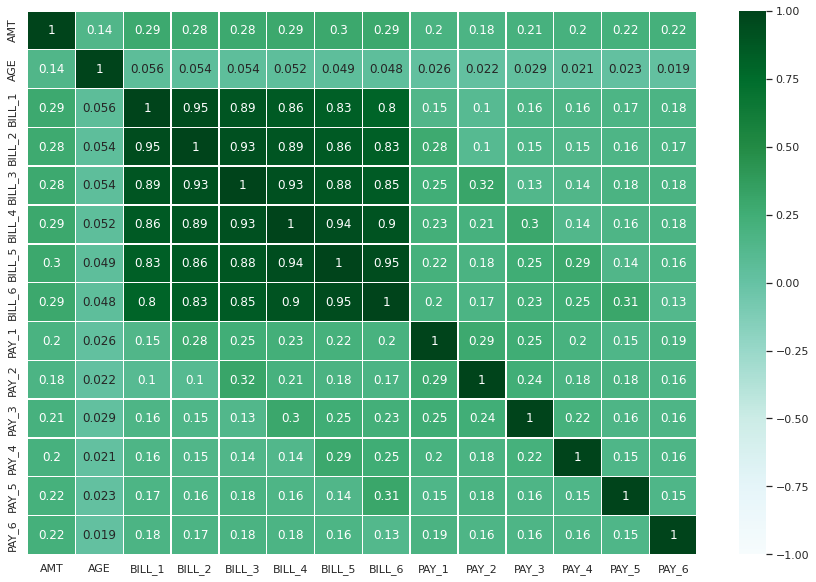

In [64]:
corrs = prep_scale_df.corr()

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)

Seguido evaluamos la proporción covarianza entre cada variable

In [65]:
Variance = np.cov(prep_scale)
Variance

array([[ 0.09848279,  0.05870532,  0.02403993, ...,  0.05481865,
         0.13464231, -0.04466356],
       [ 0.05870532,  0.05997636,  0.01244619, ...,  0.02278058,
         0.04635609, -0.07282591],
       [ 0.02403993,  0.01244619,  0.02506401, ...,  0.04549382,
         0.04644365,  0.02439614],
       ...,
       [ 0.05481865,  0.02278058,  0.04549382, ...,  0.21764039,
         0.02582778,  0.06817331],
       [ 0.13464231,  0.04635609,  0.04644365, ...,  0.02582778,
         2.43975442,  0.04211191],
       [-0.04466356, -0.07282591,  0.02439614, ...,  0.06817331,
         0.04211191,  0.18433388]])

Ahora veamos los datos de cada una

In [66]:
total = 0
for i in range(0,len(prep_scale[0])-1):
  total = total + Variance[i][i]
print('Total Variance \t\t\t:', total.round(2))
min_val = total
minv_str = ''
max_val = 0
maxv_str = ''
x_val = 0
for i in range(0,len(prep_scale[0])-1):
  x_val = ((Variance[i][i]/total)*100).round(2)
  str_val = str(x_pca.columns[i])
  if x_val > max_val:
    max_val = x_val
    maxv_str = x_pca.columns[i]
  elif x_val < min_val:
    min_val = x_val
    minv_str = x_pca.columns[i]
  print('Variance prop. of ' + str_val + ': ' + str(x_val) + '%' )

print('Min value is: ' + str(min_val) + '% in ' + minv_str)
print('Max value is: ' + str(max_val) + '% in ' + maxv_str)

Total Variance 			: 11.15
Variance prop. of AMT: 0.88%
Variance prop. of AGE: 0.54%
Variance prop. of BILL_1: 0.22%
Variance prop. of BILL_2: 0.52%
Variance prop. of BILL_3: 6.54%
Variance prop. of BILL_4: 0.74%
Variance prop. of BILL_5: 72.25%
Variance prop. of BILL_6: 0.86%
Variance prop. of PAY_1: 0.33%
Variance prop. of PAY_2: 1.32%
Variance prop. of PAY_3: 0.61%
Variance prop. of PAY_4: 4.68%
Variance prop. of PAY_5: 10.53%
Min value is: 0.22% in BILL_1
Max value is: 72.25% in BILL_5


### En resumen : la variable de la de mayor importancia es BILL_5 con un 72.25%, y la de menor importancia es BILL_1 con 0.22%



### Ahora utilizamos el método de PCA:


In [67]:
pcs = PCA()
pcs.fit(prep_scale) 

PCA()

###Ahora veamos la desviación estándar, la proporción de la variancia, y la proporción acumulativa en base los componentes principales:

In [68]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4350,1.3083,1.0223,0.9619,0.9383,0.9333,0.8820,0.8521,0.8412,0.5139,0.2680,0.2022,0.1605,0.1537
Proportion of variance,0.4235,0.1223,0.0746,0.0661,0.0629,0.0622,0.0556,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4235,0.5458,0.6204,0.6865,0.7494,0.8116,0.8672,0.9190,0.9696,0.9884,0.9936,0.9965,0.9983,1.0000


Vemos que en base a la proporción cumulativa cuantos componentes principales son necesarios para llegar a una variabilidad arriba al 70-80% y esto es igual al 74.94% hasta el componente PC5:

In [69]:
pcsSummary_df.iloc[2,4].round(4)*100

74.94

Quedando un 18.84% de los componentes PC6 al PC14

In [70]:
(1 - pcsSummary_df.iloc[2,4]).round(4)*100

25.06

### Enseguida veamos el Scree Plot:

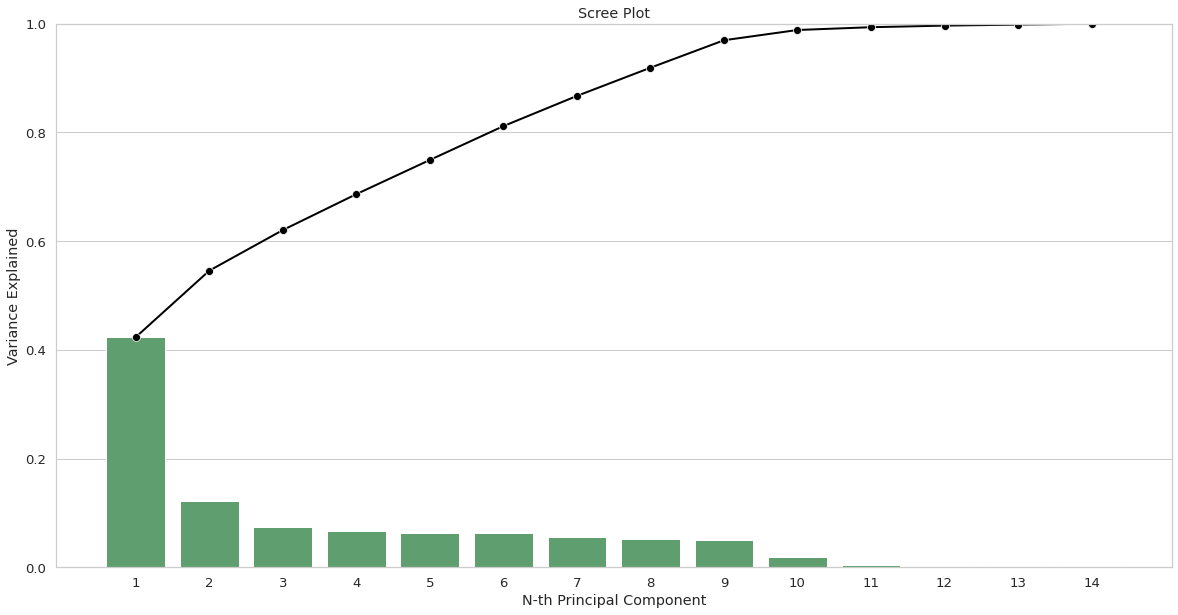

In [72]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(20, 10))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'g'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

*   El primer componente principal abarca únicamente un 42.35% de la variabilidad
*   Es necesario abarcar hasta PC6 para llegar a un 81.16% de variabilidad
*   Reducir el número de variables a menos de 5 significaría una pérdida de variabilidad considerable aprox del 31.35%
*   Existe una pérdida de variación del 25.06% incluyendo 5 componentes principales



### El número **mínimo de componentes principales** para el modelo son **5** (para tener al menos 70%)

### Intepretemos los componentes principales en base alas variables originales, usando el método de .transpose() para acomodar los componentes principales en las columnas, contra los nombres de las columnas de la base de datos original y ver el impacto de cada uno.

In [73]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=x_pca.columns
                                )
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
AMT,0.165529,0.300661,-0.378415,-0.199345,-0.024800
AGE,0.032734,0.071987,-0.870440,0.335521,0.028277
BILL_1,0.372373,-0.191242,-0.032498,-0.058676,-0.035700
BILL_2,0.382983,-0.175872,-0.001271,0.010324,-0.078062
BILL_3,0.388063,-0.127835,0.034720,0.063193,-0.124188
BILL_4,0.391464,-0.120511,0.033677,0.074012,-0.022010
BILL_5,0.388207,-0.107126,0.033011,0.036893,0.120896
BILL_6,0.380657,-0.092993,0.016897,-0.077381,0.143620
PAY_1,0.135578,0.382611,0.172536,0.362357,-0.233257
PAY_2,0.117018,0.408542,0.199775,0.347381,-0.204056


###Ahora evaluamos las variables con el mayor valor absoluto en los coeficientes PC1 a PC5

In [74]:
for pc in pcsComponents_df.iloc[:,:5]:
  print('Top 3 variables con mayores coeficientes en magnitud de: ' + pc)
  indexes_abs = pcsComponents_df[pc].abs().nlargest(3).index
  individual_pc = pcsComponents_df[pc]
  print(individual_pc[indexes_abs])

Top 3 variables con mayores coeficientes en magnitud de: PC1
BILL_4    0.391464
BILL_5    0.388207
BILL_3    0.388063
Name: PC1, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC2
PAY_2    0.408542
PAY_3    0.392587
PAY_1    0.382611
Name: PC2, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC3
AGE     -0.870440
AMT     -0.378415
PAY_2    0.199775
Name: PC3, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC4
PAY_5   -0.610281
PAY_6   -0.366869
PAY_1    0.362357
Name: PC4, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC5
PAY_4    0.642869
PAY_6   -0.595168
PAY_3    0.255059
Name: PC5, dtype: float64


### Ahi podemos ver las 3 variables con mayor magnitud de cada componente principal.



###Aqui vemos los eigen vectors:

In [75]:
pcs.components_.round(3)

array([[ 0.166,  0.033,  0.372,  0.383,  0.388,  0.391,  0.388,  0.381,
         0.136,  0.117,  0.128,  0.118,  0.114,  0.107],
       [ 0.301,  0.072, -0.191, -0.176, -0.128, -0.121, -0.107, -0.093,
         0.383,  0.409,  0.393,  0.349,  0.304,  0.322],
       [-0.378, -0.87 , -0.032, -0.001,  0.035,  0.034,  0.033,  0.017,
         0.173,  0.2  ,  0.122,  0.063, -0.06 , -0.048],
       [-0.199,  0.336, -0.059,  0.01 ,  0.063,  0.074,  0.037, -0.077,
         0.362,  0.347,  0.244, -0.093, -0.61 , -0.367],
       [-0.025,  0.028, -0.036, -0.078, -0.124, -0.022,  0.121,  0.144,
        -0.233, -0.204,  0.255,  0.643,  0.107, -0.595],
       [-0.083,  0.074, -0.046, -0.036,  0.084,  0.008, -0.08 ,  0.084,
         0.008,  0.384, -0.073, -0.414,  0.624, -0.5  ],
       [ 0.111, -0.078,  0.006, -0.032, -0.116,  0.122, -0.007,  0.009,
        -0.203, -0.277,  0.786, -0.465,  0.013,  0.026],
       [-0.062,  0.034,  0.003, -0.133,  0.093,  0.04 ,  0.05 ,  0.005,
        -0.747,  0.577,  

###Estos son los eigen values:

In [76]:
pcs.explained_variance_.round(3)

array([5.929, 1.712, 1.045, 0.925, 0.88 , 0.871, 0.778, 0.726, 0.708,
       0.264, 0.072, 0.041, 0.026, 0.024])

Veamos los boxplot de los componentes PC1 al PC5

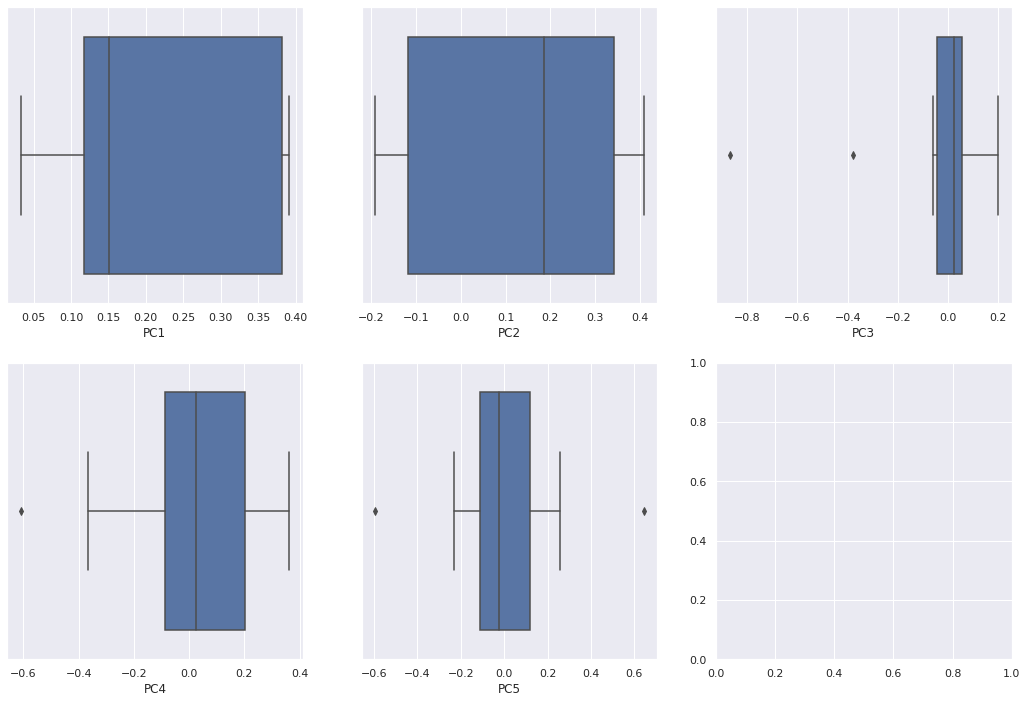

In [77]:
sns.set(rc={'figure.figsize':(18,12)})
fig, ax =plt.subplots(2,3)
j = 0
k = 0
for pc in pcsComponents_df.iloc[:,:5]:
  sns.boxplot(x=pcsComponents_df[pc],ax=ax[k,j])
  j = j + 1
  if j > 2:
    k = k + 1
    j = 0
plt.show()

#8.- Histogramas de las distribuciones de las variables

In [78]:
numericas=x_pca.columns
numericas

Index(['AMT', 'AGE', 'BILL_1', 'BILL_2', 'BILL_3', 'BILL_4', 'BILL_5',
       'BILL_6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],
      dtype='object')

##Graficas de Distribucion Variables Numericas

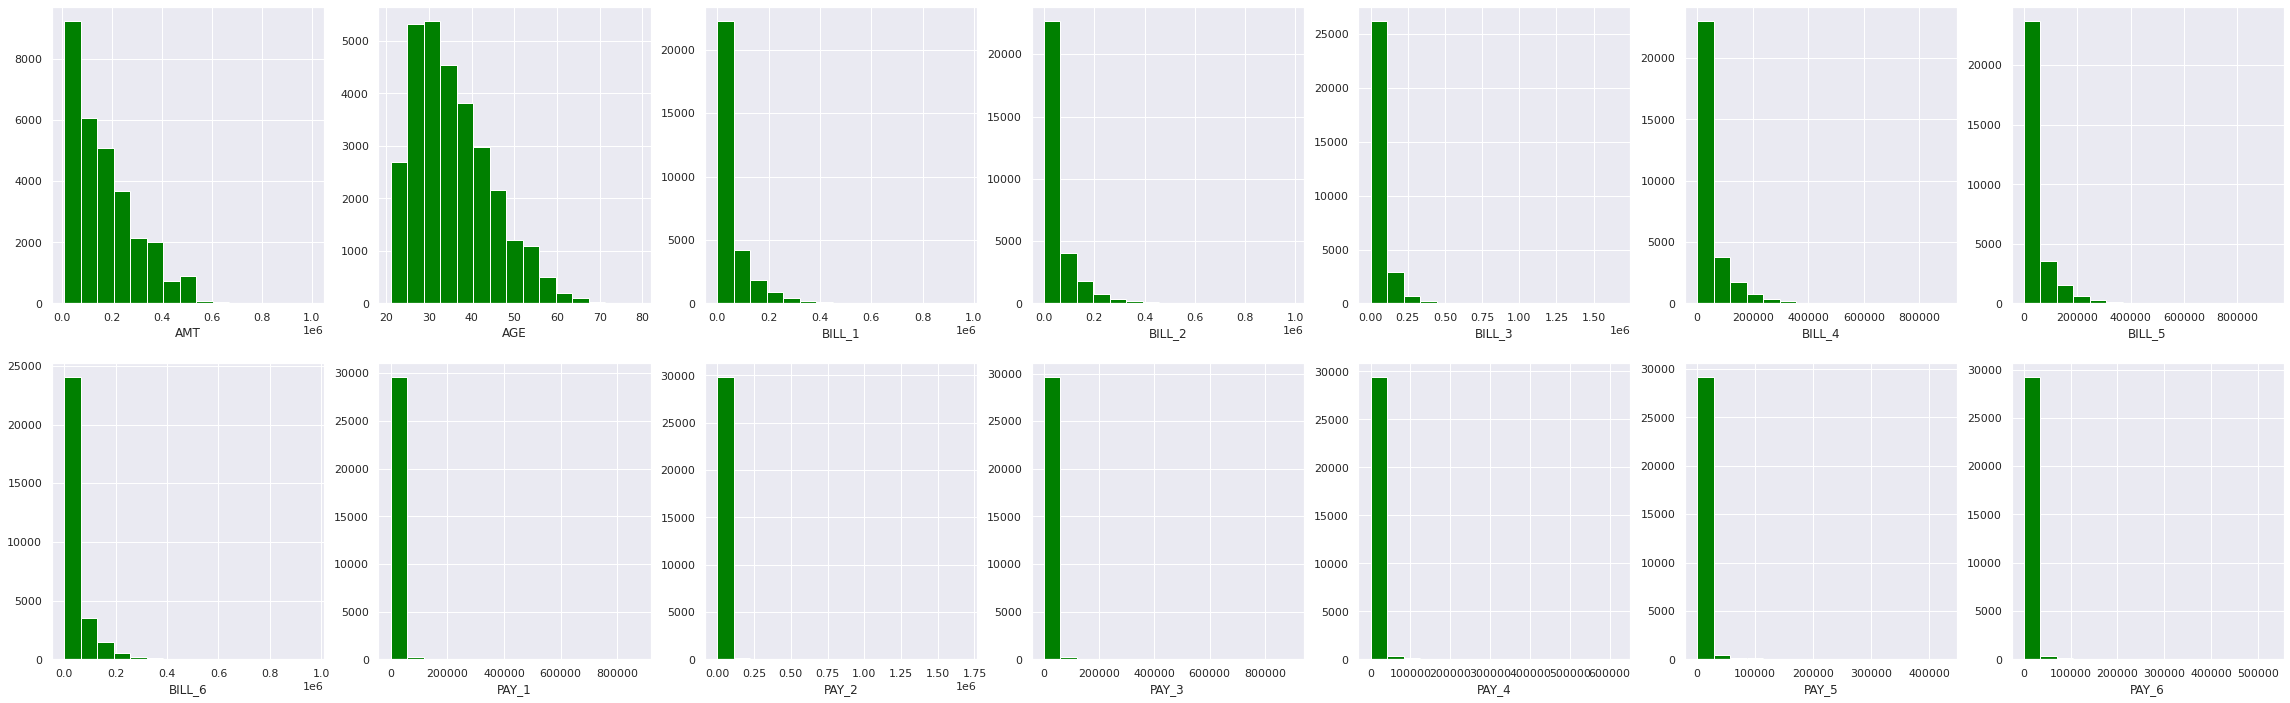

In [81]:
sns.set(rc={'figure.figsize':(40,12)})
fig, axes = plt.subplots(2, 7)
i = 0
for col in df2[numericas].columns:
  plt.subplot(2, 7,i+1) 
  plt.hist(df2[col], bins=15,color='green') 
  plt.xlabel(df2[numericas].columns[i])
  i = i + 1

###Variables numericas ESCALADAS

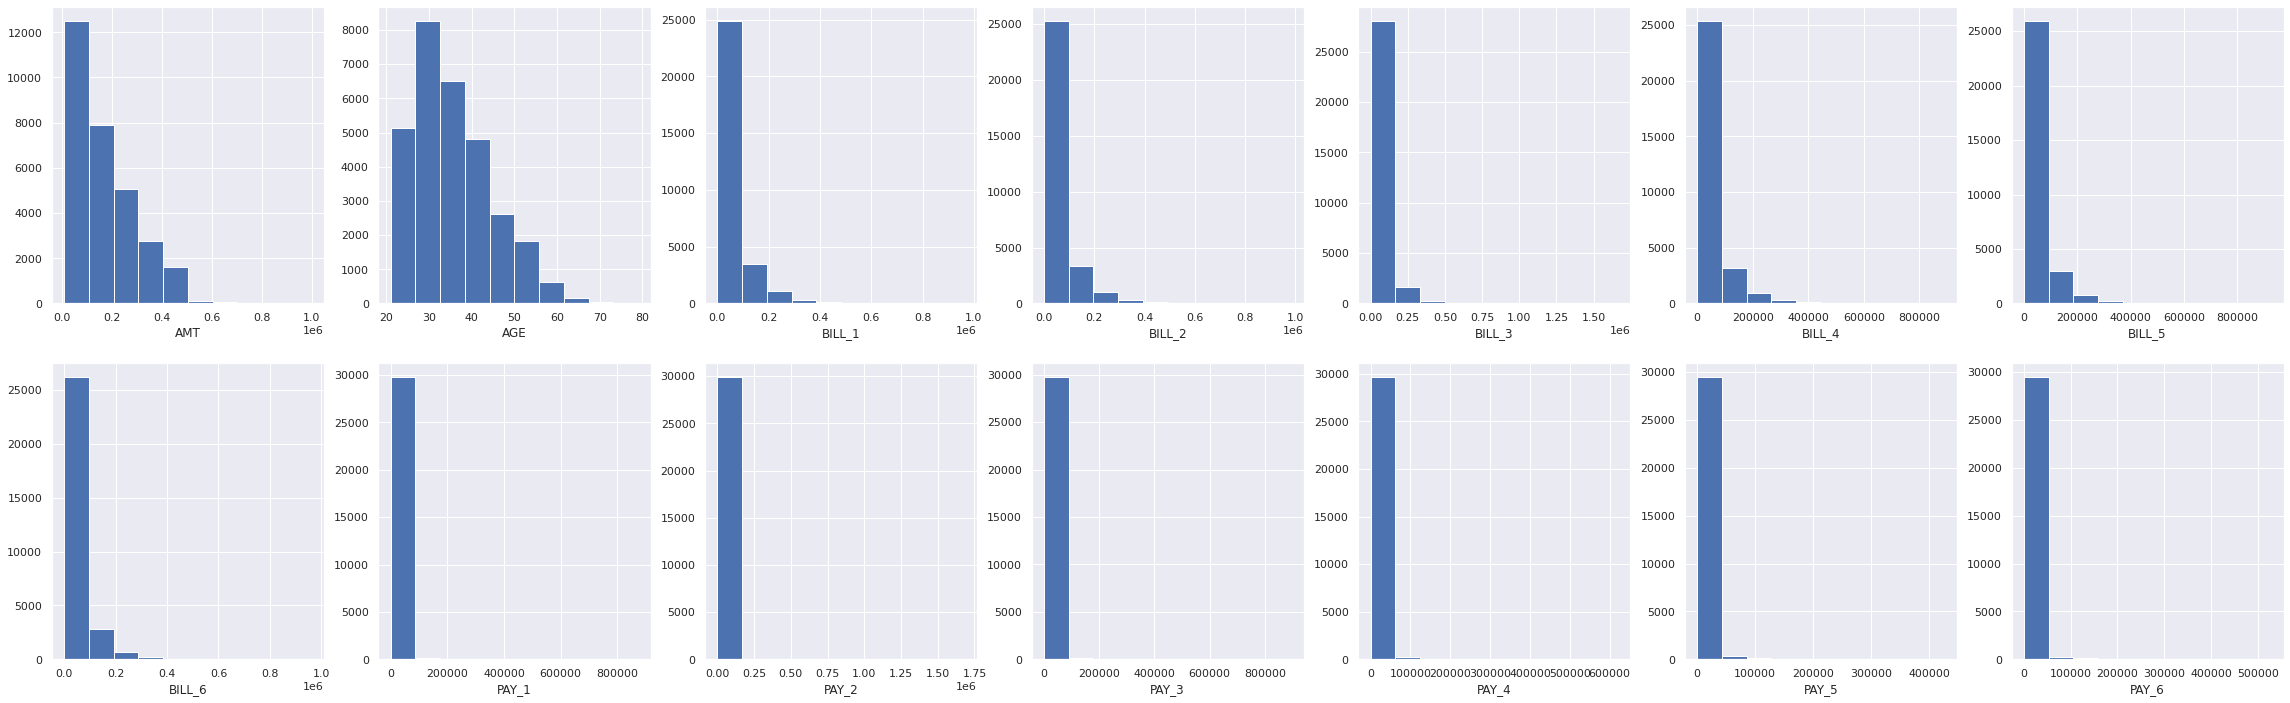

In [82]:
sns.set(rc={'figure.figsize':(40,12)})
fig, axes = plt.subplots(2, 5)
i = 0
for col in x_pca[numericas].columns:
  plt.subplot(2, 7,i+1) 
  plt.hist(x_pca[col], bins=10) 
  plt.xlabel(x_pca[numericas].columns[i])
  i = i + 1

##9.- BOXPLOTS DE LAS VARIABLES NUMERICAS

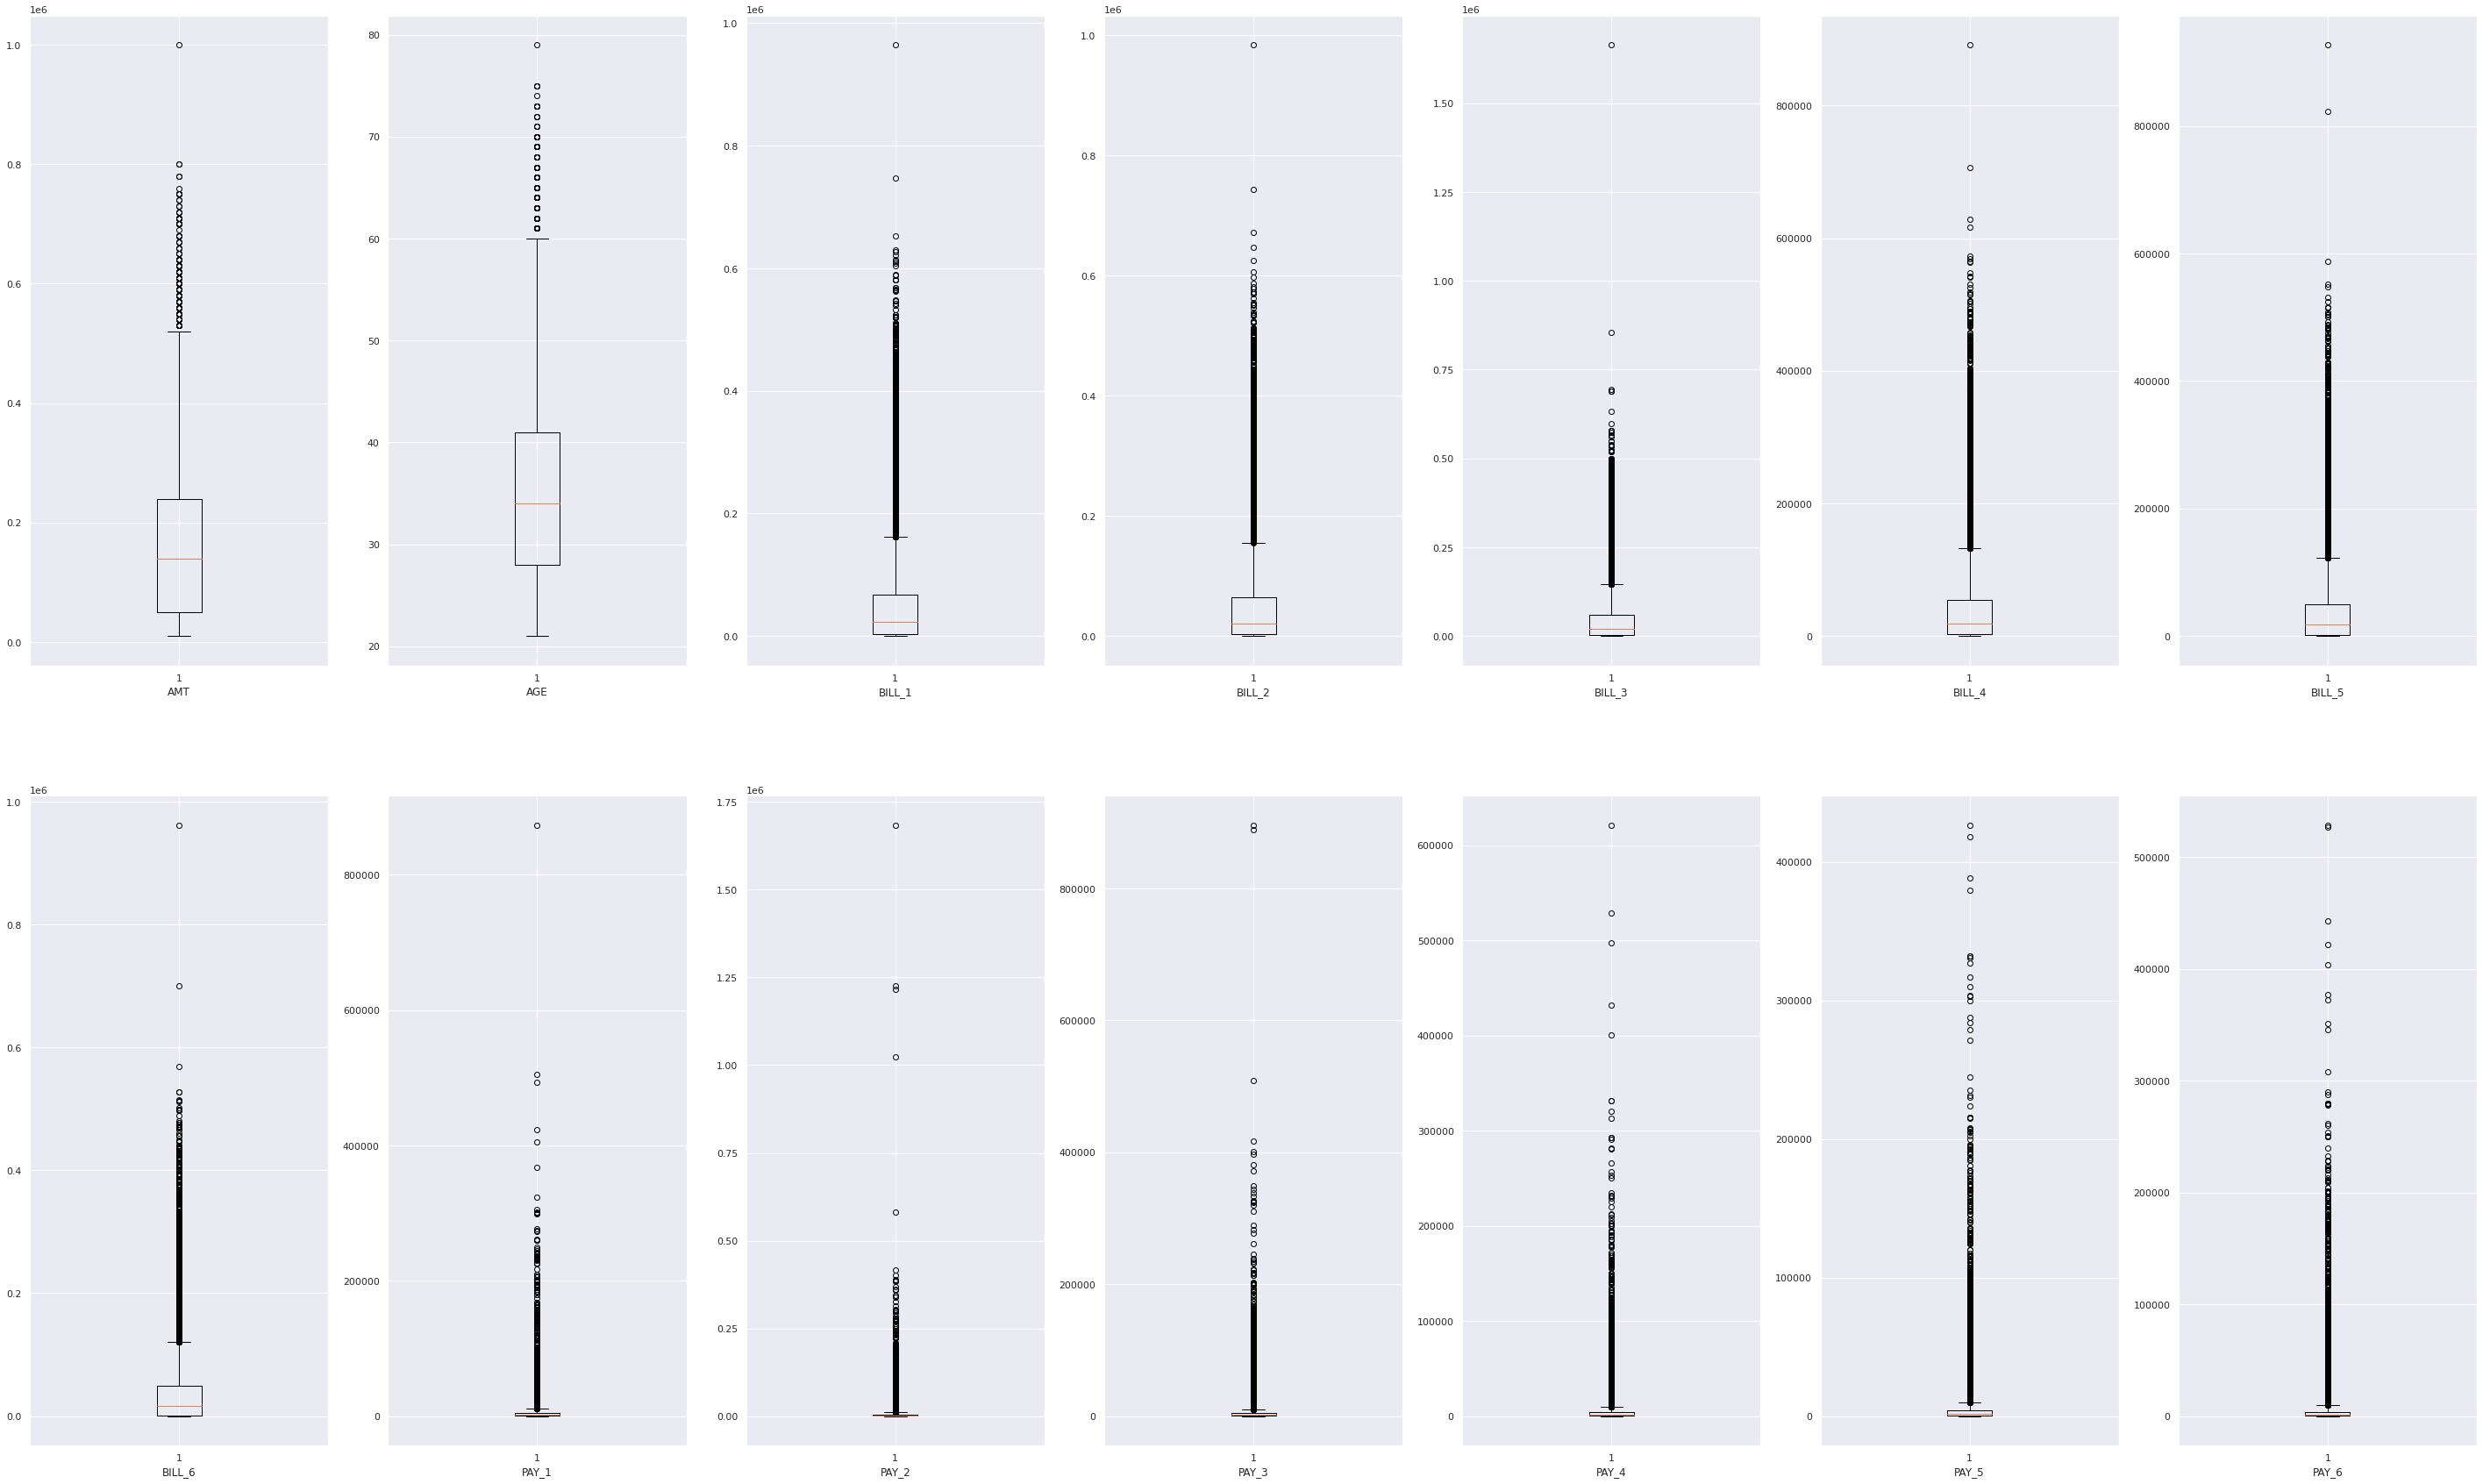

In [83]:
sns.set(rc={'figure.figsize':(50,30)})
fig, axes = plt.subplots(2, 7)
i = 0
for col in df2[numericas].columns:
  plt.subplot(2, 7,i+1) 
  plt.boxplot(df2[col]) 
  plt.xlabel(df2[numericas].columns[i])
  i = i + 1

#Pairplot de Variables numericas

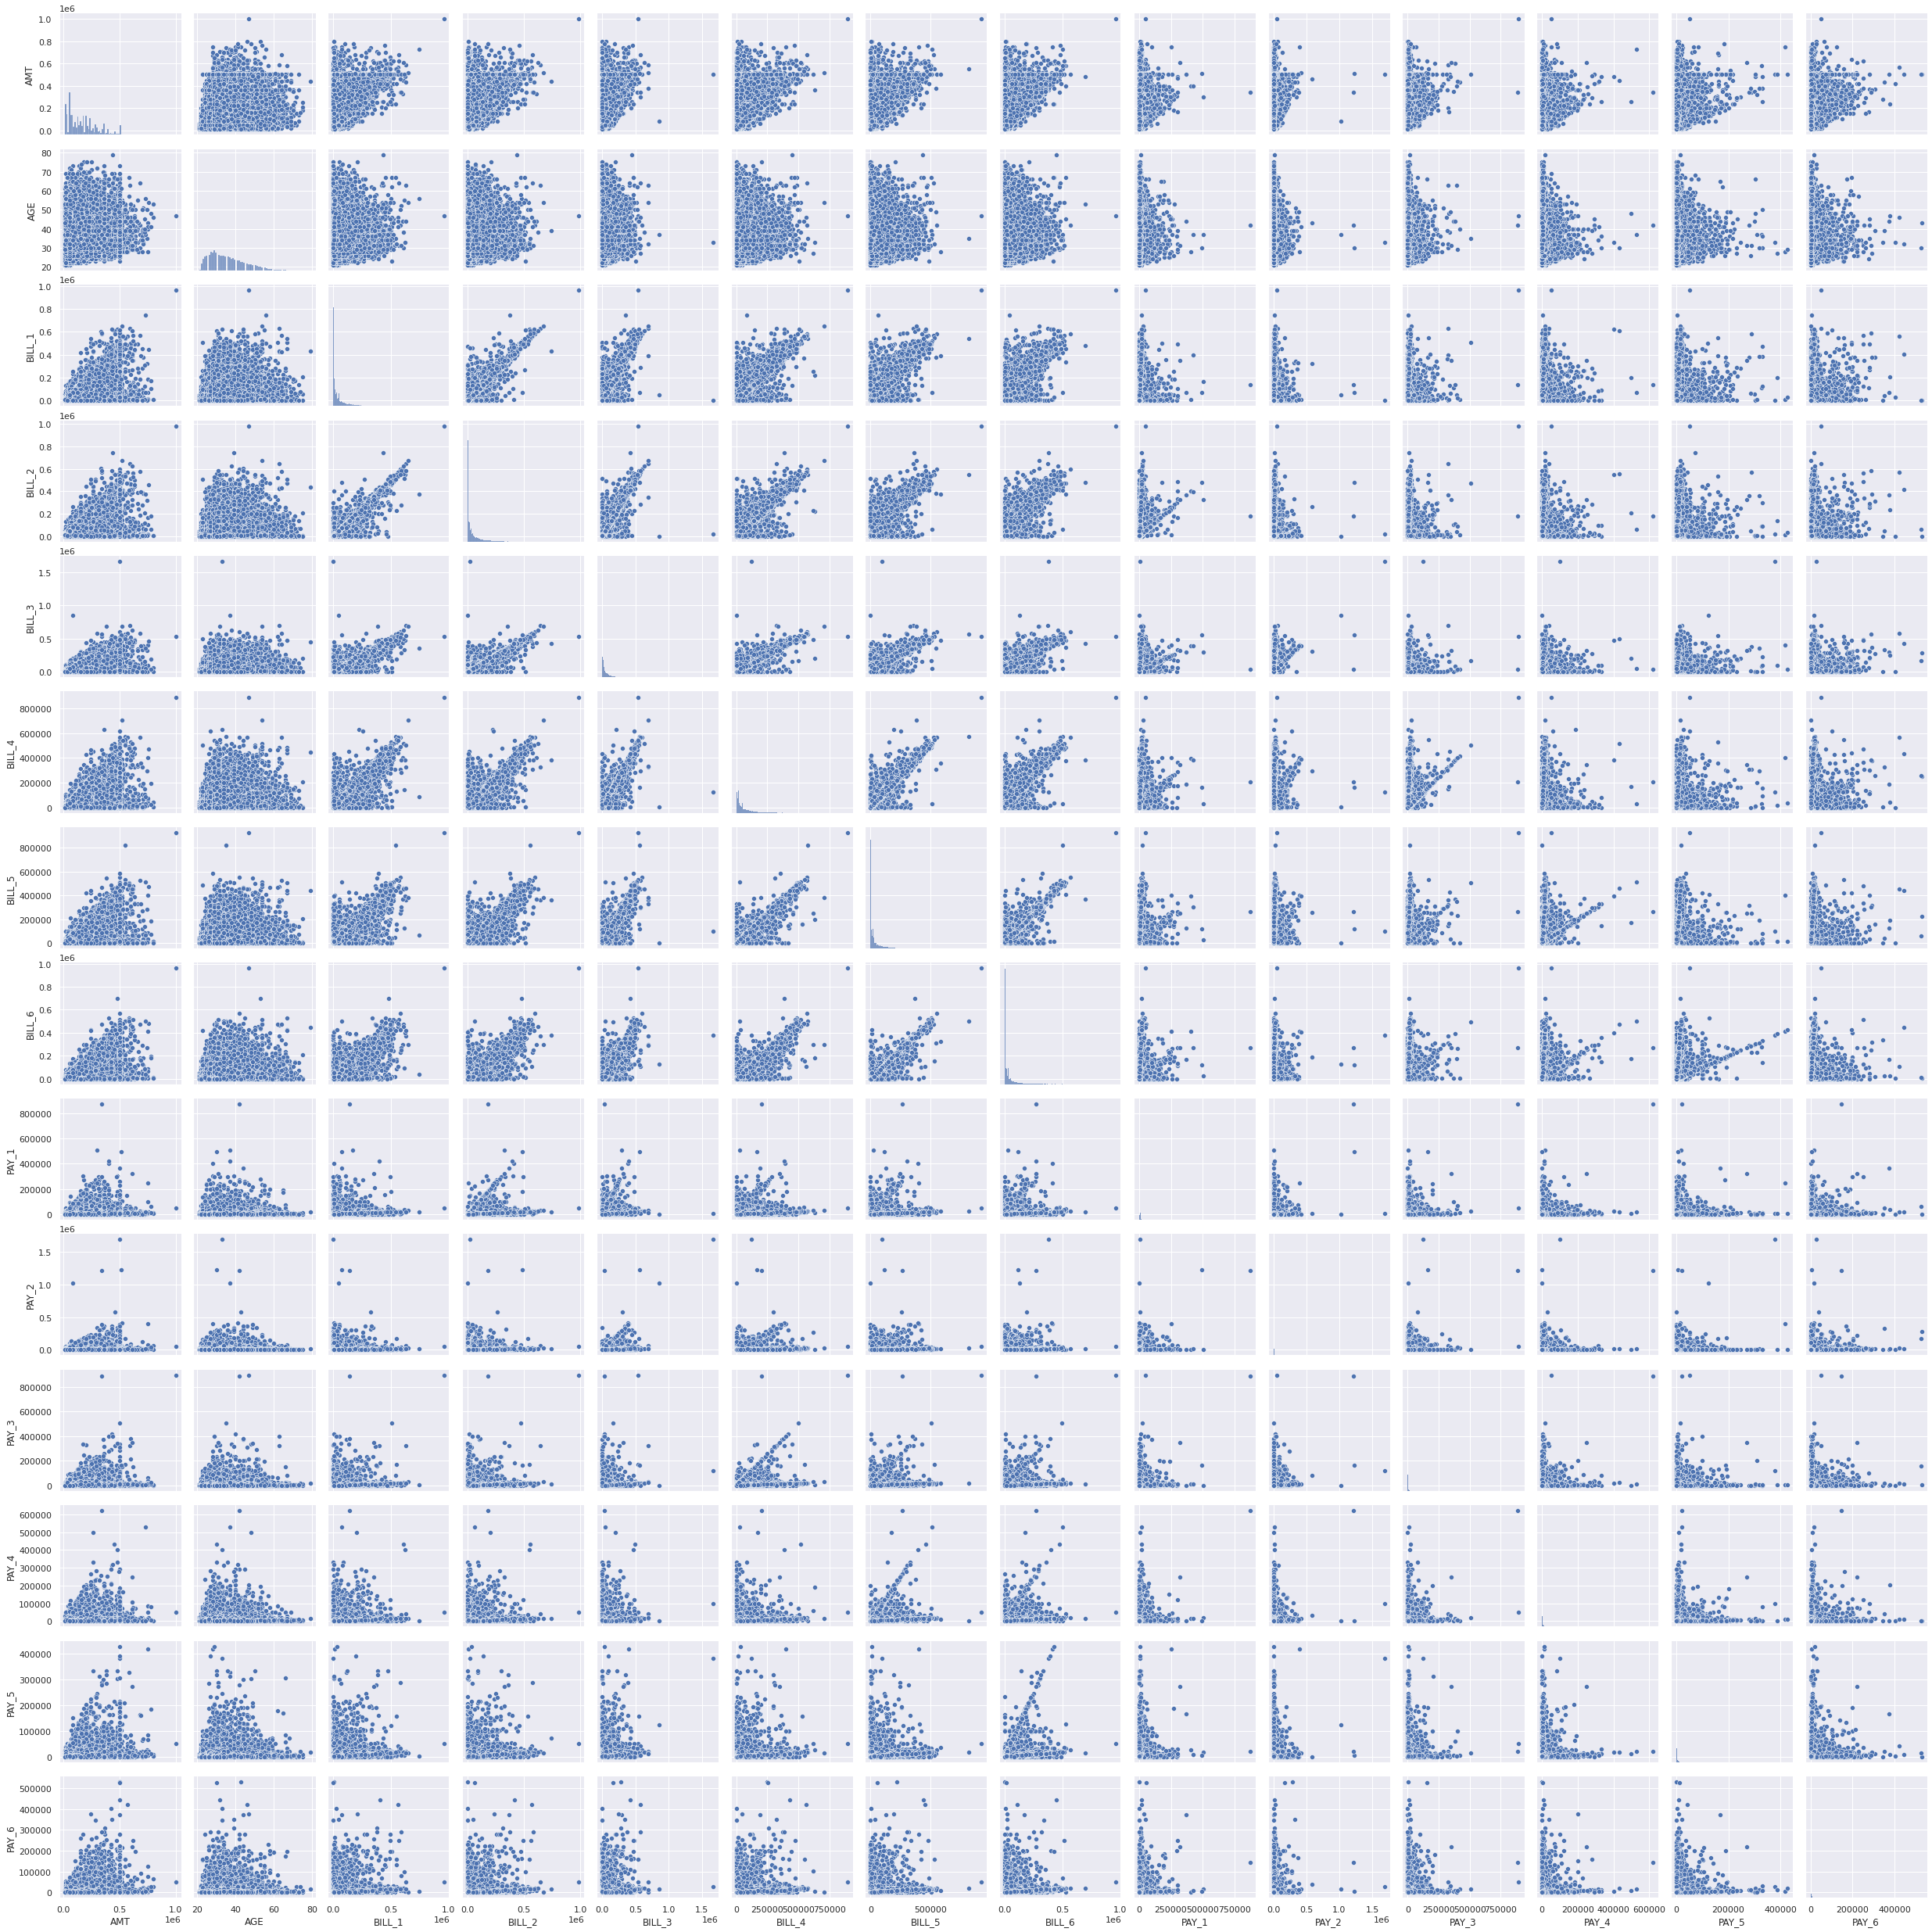

In [ ]:
sns.pairplot(df2[numericas])


#Graficos de categoricas

In [84]:
categoricas=['SEX','EDUCATION','MARRIAGE','PAYSTAT_1','PAYSTAT_2','PAYSTAT_3','PAYSTAT_4','PAYSTAT_5','PAYSTAT_6','Y']
df3=df2[categoricas]
df3.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAYSTAT_1', 'PAYSTAT_2', 'PAYSTAT_3',
       'PAYSTAT_4', 'PAYSTAT_5', 'PAYSTAT_6', 'Y'],
      dtype='object')

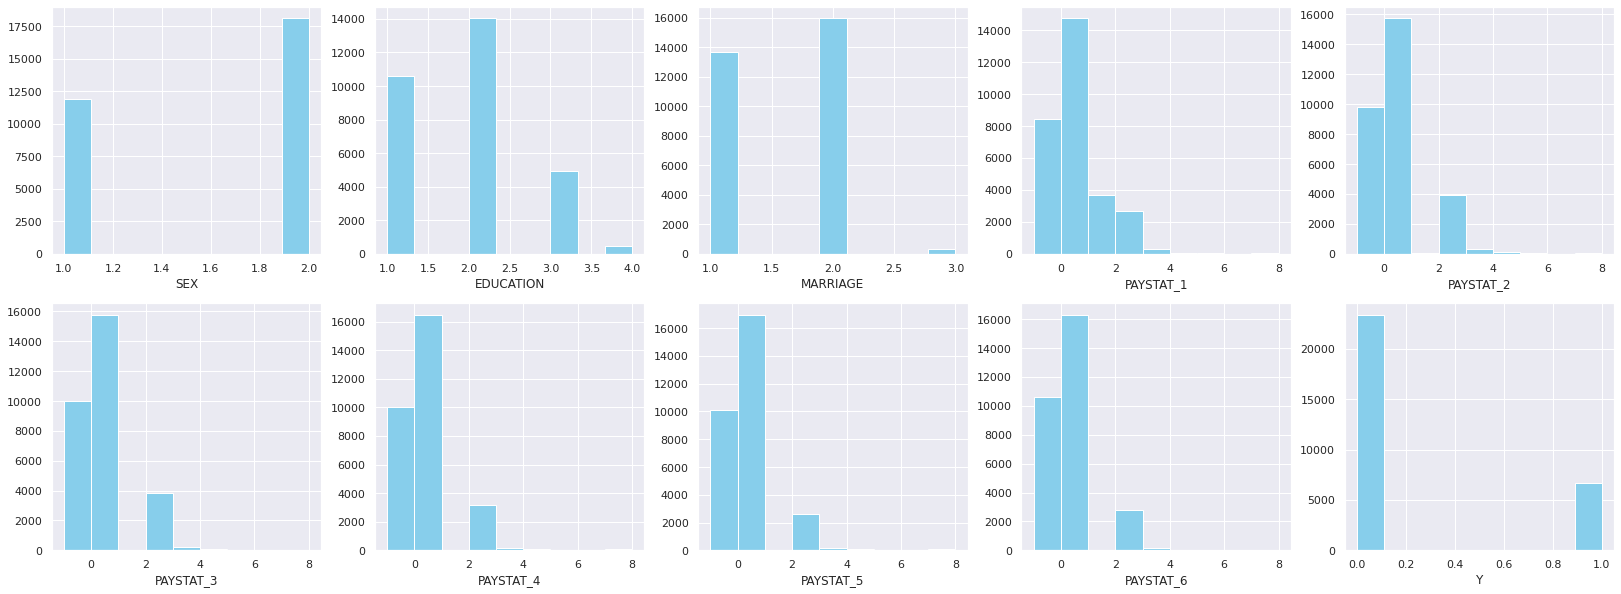

In [85]:
sns.set(rc={'figure.figsize':(28,10)})
fig, axes = plt.subplots(2, 5)
i = 0
for col in df3[categoricas].columns:
  plt.subplot(2, 5,i+1) 
  plt.hist(df3[col], bins=9,color='skyblue') 
  plt.xlabel(df3[categoricas].columns[i])
  i = i + 1

##Graficas de Barrras para Variables Categóricas

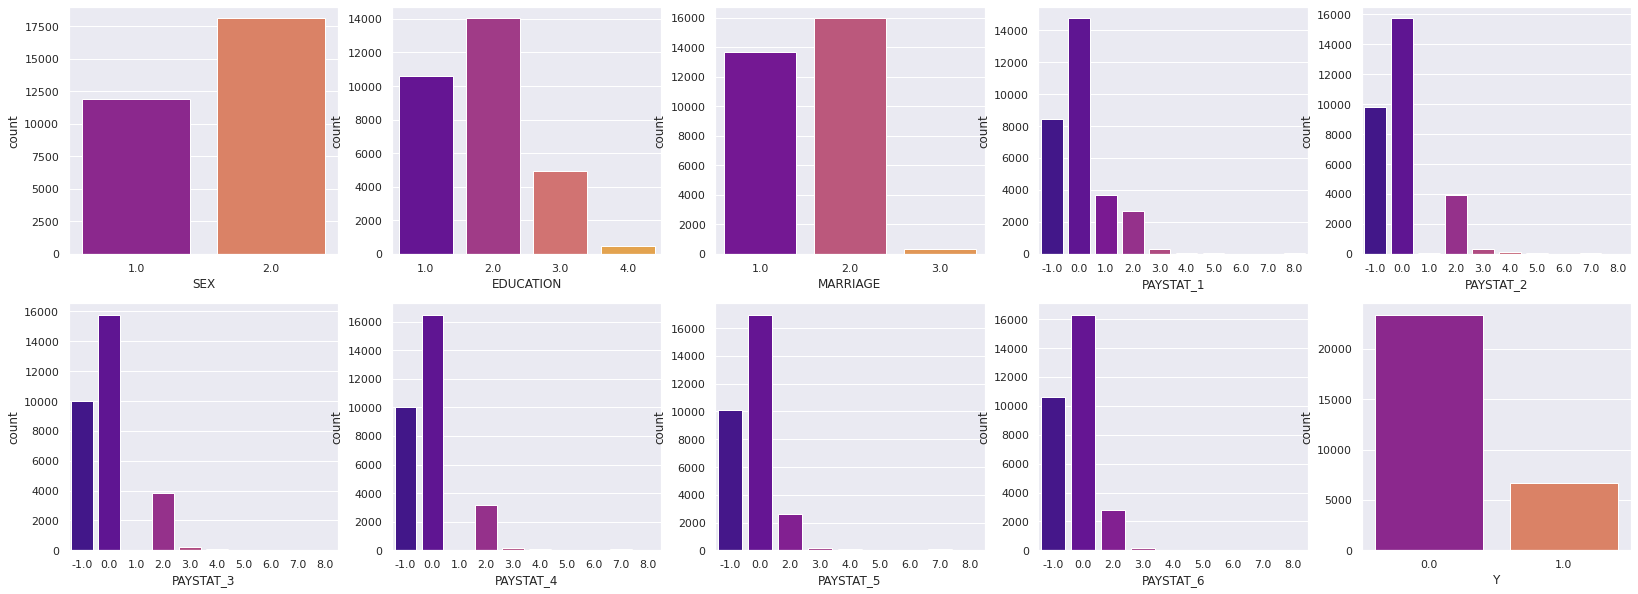

In [86]:
fig, axes = plt.subplots(2, 5)
i = 0
for col in df3[categoricas].columns:
  plt.subplot(2, 5,i+1) 
  sns.countplot(x=df3[col],data=df3,palette='plasma')
  plt.xlabel(df3[categoricas].columns[i])
  i = i + 1

#Graficas de Pie de Categoricas

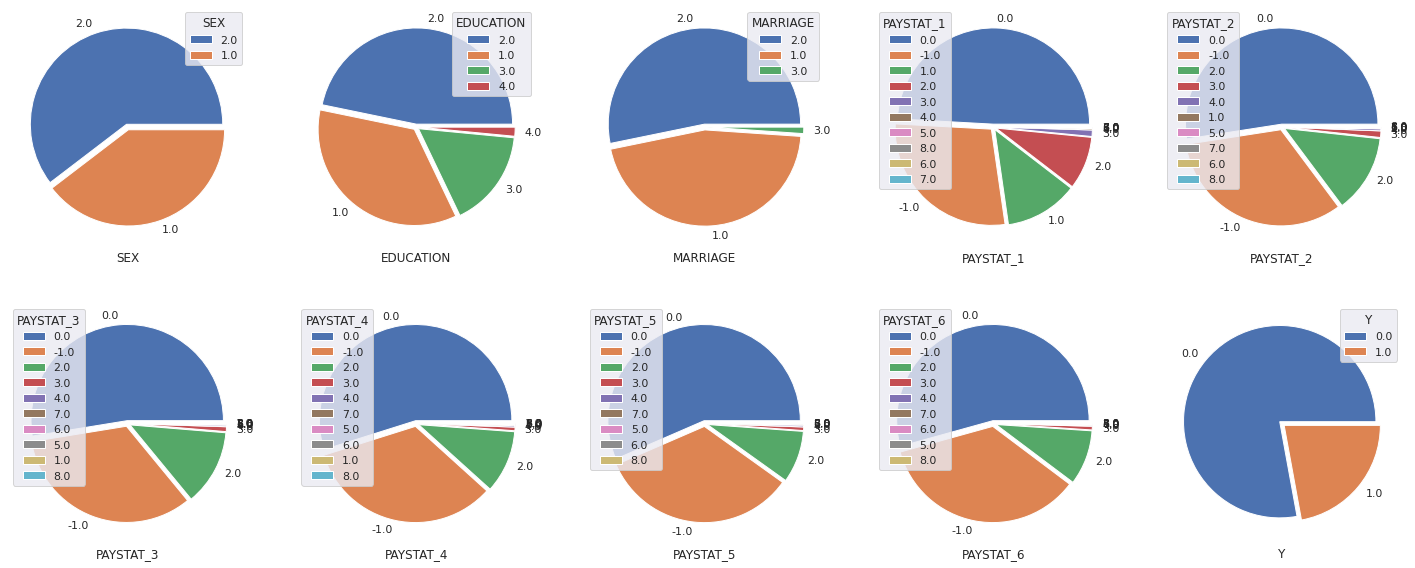

In [87]:
sns.set(rc={'figure.figsize':(25,10)})
fig, axes = plt.subplots(2, 5)
myexplode = {'SEX':[.03,.03], 'EDUCATION': [.03,.03,.03,.03],'MARRIAGE': [.03,.03,.03],'PAYSTAT_1': [.03,.03,.03,.03,.03,.03,.03,.03,.03,.03],
             'PAYSTAT_2': [.03,.03,.03,.03,.03,.03,.03,.03,.03,.03],'PAYSTAT_3': [.03,.03,.03,.03,.03,.03,0.03,.03,.03,.03],
             'PAYSTAT_4': [.03,.03,.03,.03,.03,.03,.03,.03,.03,.03],
             'PAYSTAT_5': [.03,.03,.03,.03,.03,.03,.03,.03,.03],'PAYSTAT_6': [.03,.03,.03,.03,.03,.03,.03,.03,.03],'Y': [.03,.03]
             }
i = 0
for col in df3[categoricas].columns:
  plt.subplot(2, 5,i+1) 
  explodex=myexplode[col]
  labelsx=df3[col].value_counts().index.to_list()
  plt.pie(df3[col].value_counts(),explode=explodex, labels=labelsx)
  plt.xlabel(df3[categoricas].columns[i])
  plt.legend(title=col)
  i = i + 1